In [1]:
from google.colab import files
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
#colab plot의 한글깨짐 해결

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
files = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [4]:
df = pd.read_csv('vgames2.csv')
df = df.drop(columns = ['Unnamed: 0'], axis = 1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


EDA & 데이터 전처리

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB
None
               Year
count  16327.000000
mean    1994.242543
std      155.077168
min        0.000000
25%     2003.000000
50%     2007.000000
75%     2010.000000
max     2020.000000


In [6]:
#출구량 데이터의 문자열(K,M)을 정수형으로 변환
# K = 1,000 , M = 1,000,000

def toint(x):
  try:
    return pd.to_numeric(x) * 1000000

  except:
      if 'K' in x:
        return float(x.replace('K', '')) * 1000

      elif 'M' in x:
        return float(x.replace('M', '')) * 1000000

for col in ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']:
  df[col] = df[col].apply(toint)

print(df.dtypes)
df.head()

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


In [7]:
# 결측치 처리
df.dropna(inplace = True)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [8]:
platform = df['Platform'].unique()
print(len(platform))
platform

31


array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
year = df['Year'].astype(int)
year = year.unique()
print(len(year))
year

62


array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [10]:
genre = df['Genre'].unique()
print(len(genre))
genre

12


array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [11]:
publisher = df['Publisher'].unique()
print(len(publisher))
publisher

575


array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [12]:
# 연도 데이터에서 연도가 아닌 데이터 조정

def years(x):
  if x <= 20:
    return x + 2000

  elif x <= 100:
    return x +1900

  else:
    return x

In [13]:
df['Year'] = df['Year'].apply(years)
df['Year'] = df['Year'].astype(int)
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

지역에 따른 선호하는 게임 장르

In [14]:
# 전체 출구량

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

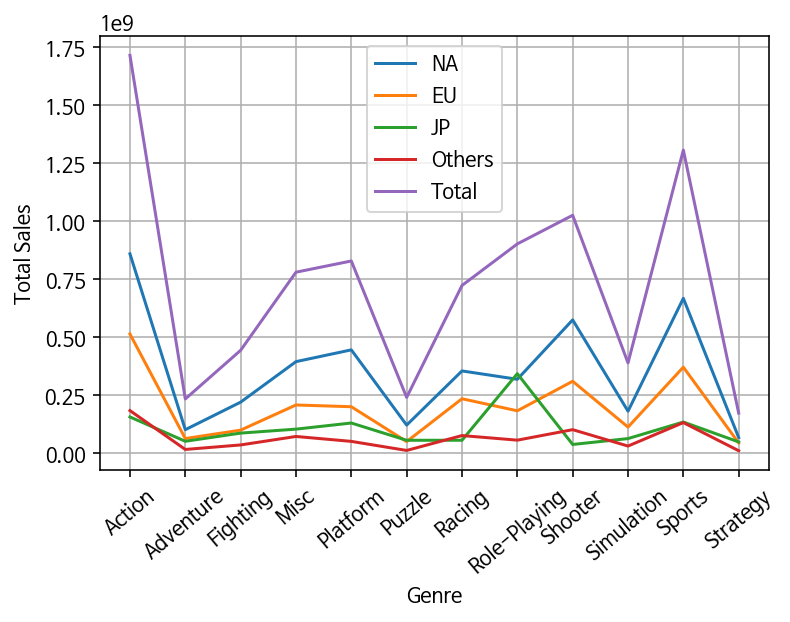

In [15]:
# 지역별 게임 출고량 분포 확인

group = df.groupby('Genre').sum()

plt.plot(group['NA_Sales'],label = 'NA')
plt.plot(group['EU_Sales'],label = 'EU')
plt.plot(group['JP_Sales'],label = 'JP')
plt.plot(group['Other_Sales'],label = 'Others')
plt.plot(group['Total_Sales'],label = 'Total')

plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=40)
plt.grid()
plt.legend()

plt.show();

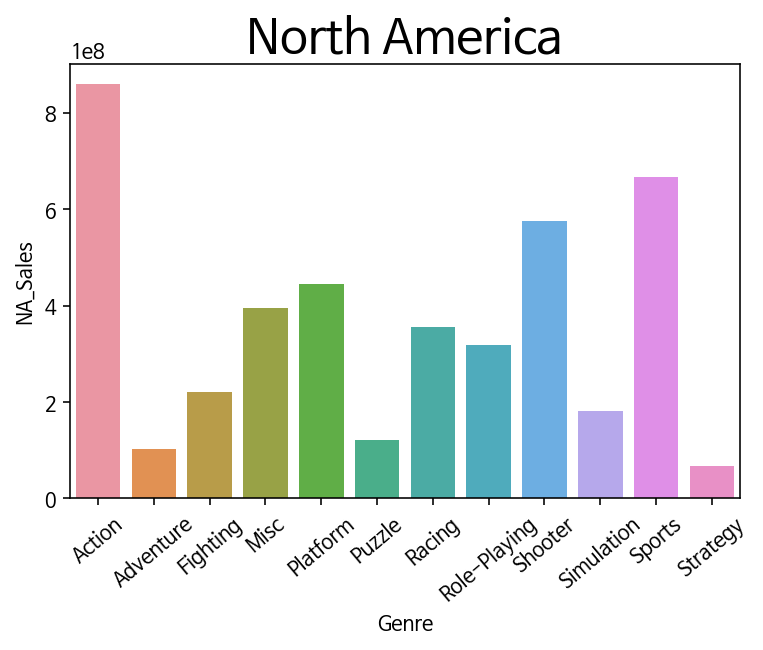

In [16]:
#북미 선호하는 게임 장르

genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() 
genre_na = genre_na.reset_index()

sns.barplot(data = genre_na, x = 'Genre', y = 'NA_Sales')
plt.title('North America', fontsize = 24)
plt.xticks(rotation = 40)
plt.show();

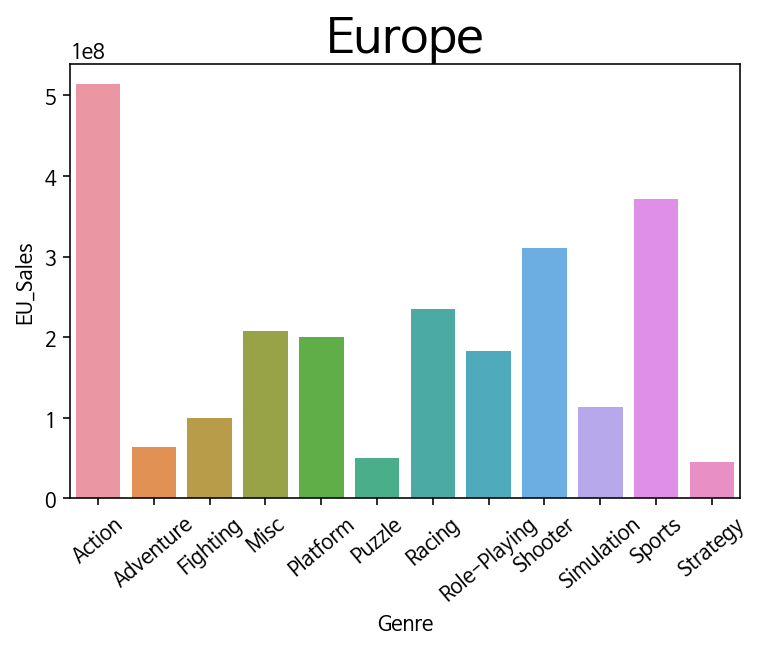

In [17]:
# 유럽 선호하는 게임 장르

genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() 
genre_eu = genre_eu.reset_index()

sns.barplot(data = genre_eu, x = 'Genre', y = 'EU_Sales')
plt.title('Europe', fontsize = 24)
plt.xticks(rotation = 40)
plt.show();

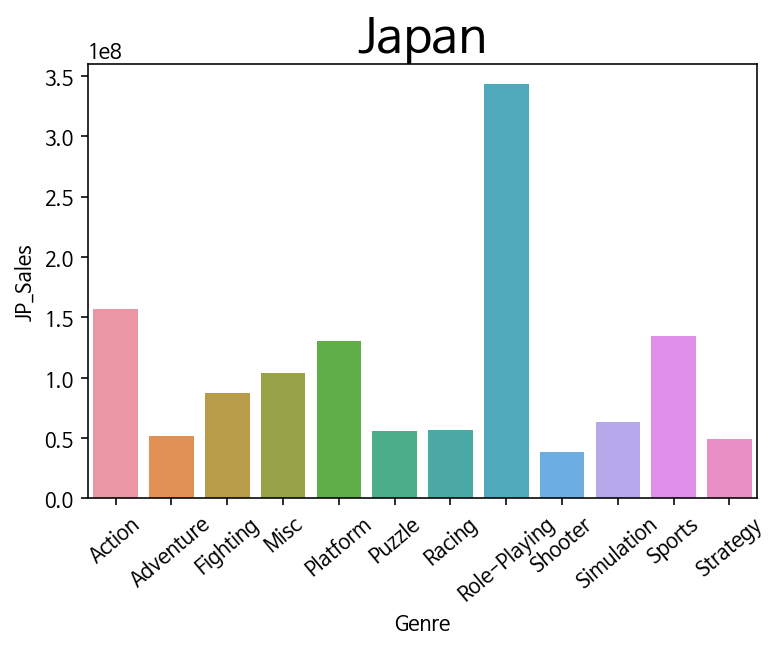

In [18]:
# 일본 선호하는 게임 장르

genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() 
genre_jp = genre_jp.reset_index()

sns.barplot(data = genre_jp, x = 'Genre', y = 'JP_Sales')
plt.title('Japan', fontsize = 24)
plt.xticks(rotation = 40)
plt.show();

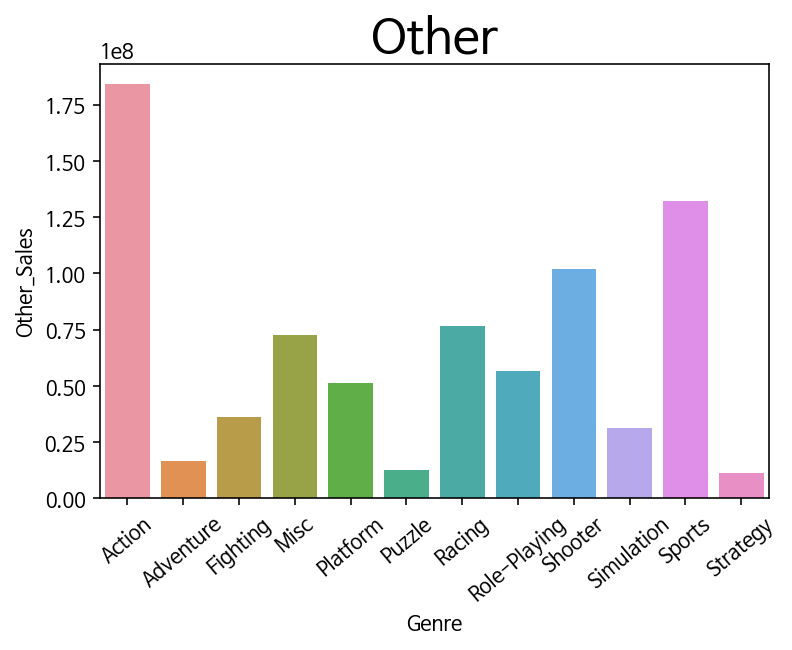

In [19]:
# 그 외 선호하는 게임 장르

genre_O = df.groupby(by=['Genre'])['Other_Sales'].sum() 
genre_O = genre_O.reset_index()

sns.barplot(data = genre_O, x = 'Genre', y = 'Other_Sales')
plt.title('Other', fontsize = 24)
plt.xticks(rotation = 40)
plt.show();

연도별 게임의 트렌드

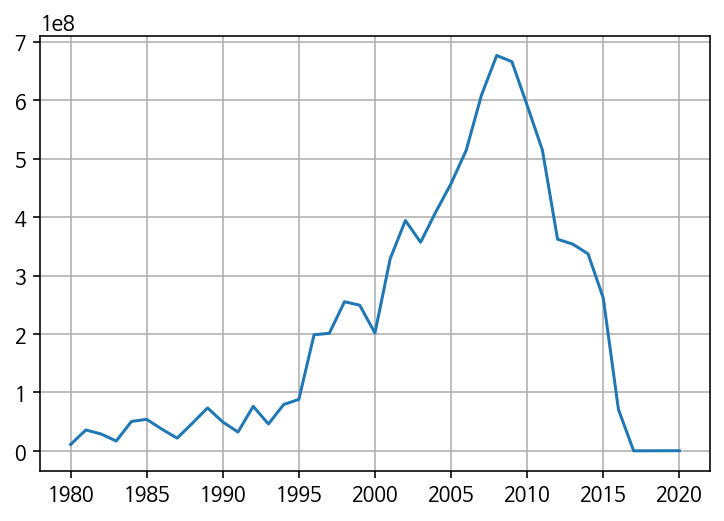

In [20]:
# 연도별 총 출고량

plt.plot(df.groupby('Year')['Total_Sales'].sum())
plt.grid()
plt.show()

In [21]:
# 연도별 최고 출고량을 기록한 장르 뽑기

year_gen = df.groupby(by = ['Year', 'Genre'])['Total_Sales'].sum().reset_index()

max_year_gen = year_gen.groupby(by = ['Year'])['Total_Sales'].transform(max) == year_gen['Total_Sales']
max_year_gen = year_gen[max_year_gen].reset_index(drop = True)

genre = max_year_gen['Genre']

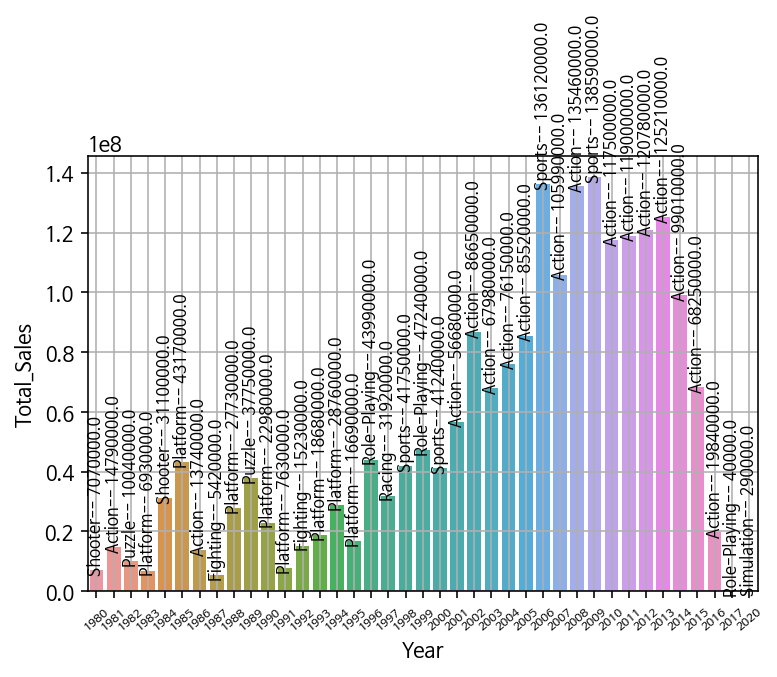

In [22]:
ax = sns.barplot(x = 'Year', y = 'Total_Sales', data = max_year_gen)
idx = 0

for value in max_year_gen['Total_Sales']:
    ax.text(x = idx, y = value + 5, s = str(genre[idx] + '--' + ' ' + str(round(value, 2))), fontsize = 8, rotation = 90, ha = 'center')
    idx += 1
plt.xticks(fontsize = 6, rotation = 40)
plt.grid()

plt.show()

In [23]:
# 연대별 게임 장르의 트렌드의 변화

gen_trend = df[df['Year'] <= 1990].groupby('Genre')['Total_Sales'].sum()
gen_trend['Strategy'] = 0

gt = pd.DataFrame([gen_trend, 
                   df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Genre')['Total_Sales'].sum(),
                   df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum(),
                   df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Genre')['Total_Sales'].sum()],
                   index = ['1980','1990','2000','2010'])

In [24]:
print('\nchi_square statistics:',stats.chi2_contingency(gt)[0])
print('p-value:',stats.chi2_contingency(gt)[1])


chi_square statistics: 1441865729.9624863
p-value: 0.0


출고량이 높은 게임

In [25]:
# 출고량 상위1%

top = df.nlargest(165,columns='Total_Sales')
top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...
15508,Mario Kart: Super Circuit,GBA,2001,Racing,Nintendo,2620000.0,1640000.0,990000.0,230000.0,5480000.0
14424,Super Mario World,GBA,2001,Platform,Nintendo,3210000.0,1110000.0,950000.0,200000.0,5470000.0
9650,Pokemon Stadium,N64,1999,Strategy,Nintendo,3180000.0,1240000.0,940000.0,90000.0,5450000.0
8715,Call of Duty: World at War,PS3,2008,Shooter,Activision,2720000.0,1870000.0,0.0,840000.0,5430000.0


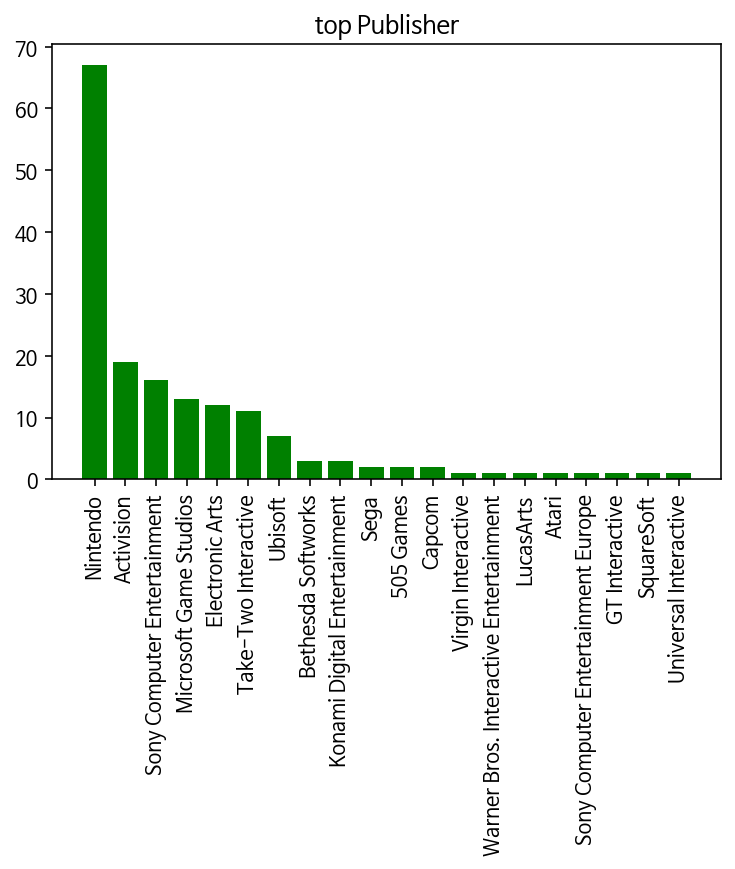

In [41]:
# 출고량 상위 1%의 게임 회사

plt.bar(top['Publisher'].value_counts().index,top['Publisher'].value_counts(), color = 'g')
plt.title('top Publisher')
plt.xticks(rotation=90)

plt.show()

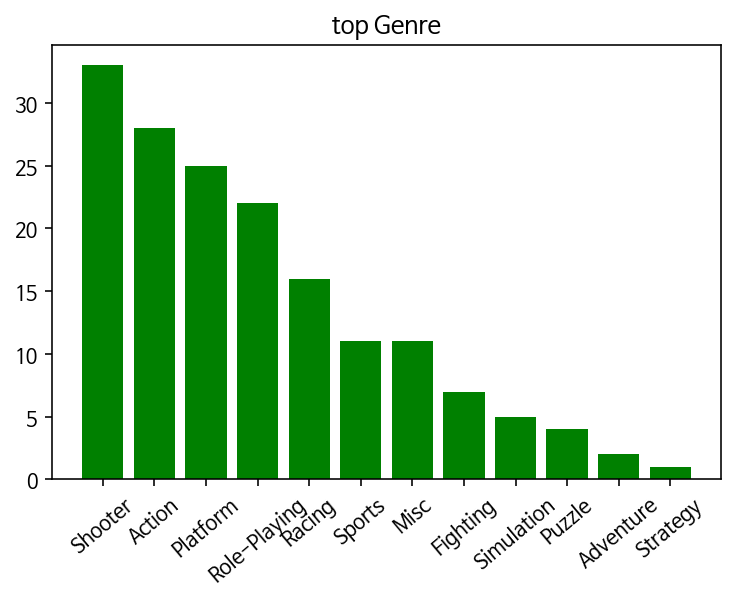

In [27]:
# 출고량 상위 1%의 게임 장르

plt.bar(top['Genre'].value_counts().index,top['Genre'].value_counts(), color = 'g')
plt.title('top Genre')
plt.xticks(rotation=40)

plt.show()

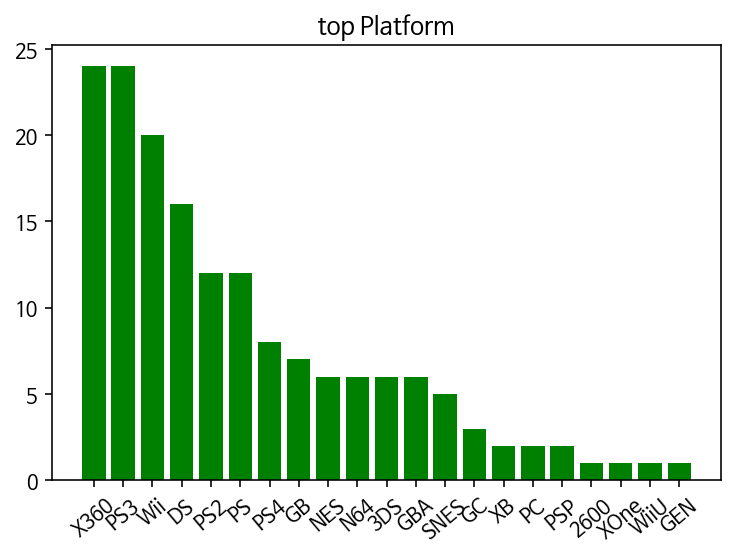

In [28]:
# 출고량 상위 1%의 게임 플랫폼

plt.bar(top['Platform'].value_counts().index,top['Platform'].value_counts(), color = 'g')
plt.title('top Platform')
plt.xticks(rotation=40)

plt.show()

In [29]:
# 연도별 최고 출고량을 기록한 플랫폼


year_pf = df.groupby(by = ['Year', 'Platform'])['Total_Sales'].sum().reset_index()

max_year_pf = year_pf.groupby(by = ['Year'])['Total_Sales'].transform(max) == year_pf['Total_Sales']
max_year_pf = year_pf[max_year_pf].reset_index(drop = True)

genre = max_year_pf['Platform']

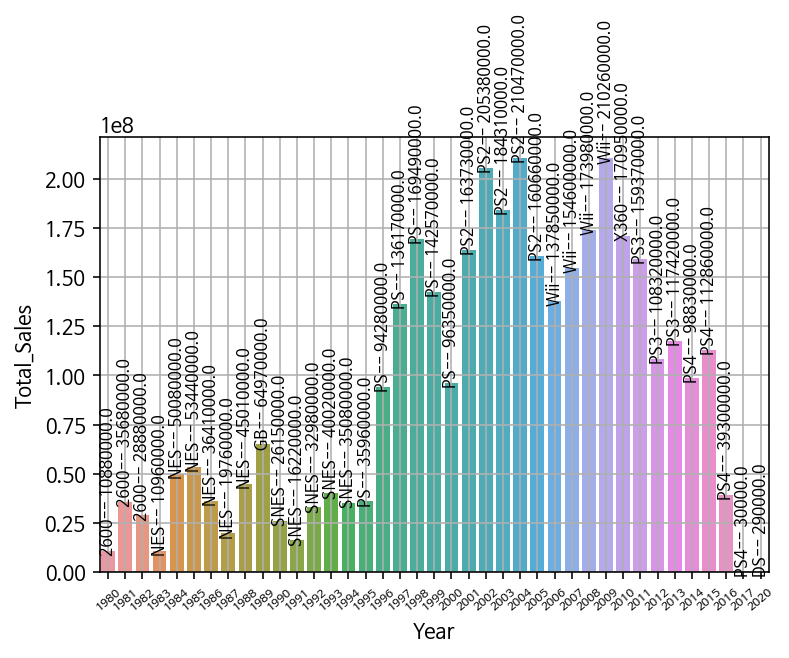

In [30]:
ax = sns.barplot(x = 'Year', y = 'Total_Sales', data = max_year_pf)
idx = 0

for value in max_year_pf['Total_Sales']:
    ax.text(x = idx, y = value + 5, s = str(genre[idx] + '--' + ' ' + str(round(value, 2))), fontsize = 8, rotation = 90, ha = 'center')
    idx += 1
plt.xticks(fontsize = 6, rotation = 40)
plt.grid()

plt.show()

In [31]:
# 연도별 최고 출고량을 기록한 회사

year_pub = df.groupby(by = ['Year', 'Publisher'])['Total_Sales'].sum().reset_index()

max_year_pub = year_pub.groupby(by = ['Year'])['Total_Sales'].transform(max) == year_pub['Total_Sales']
max_year_pub = year_pub[max_year_pub].reset_index(drop = True)

genre = max_year_pub['Publisher']

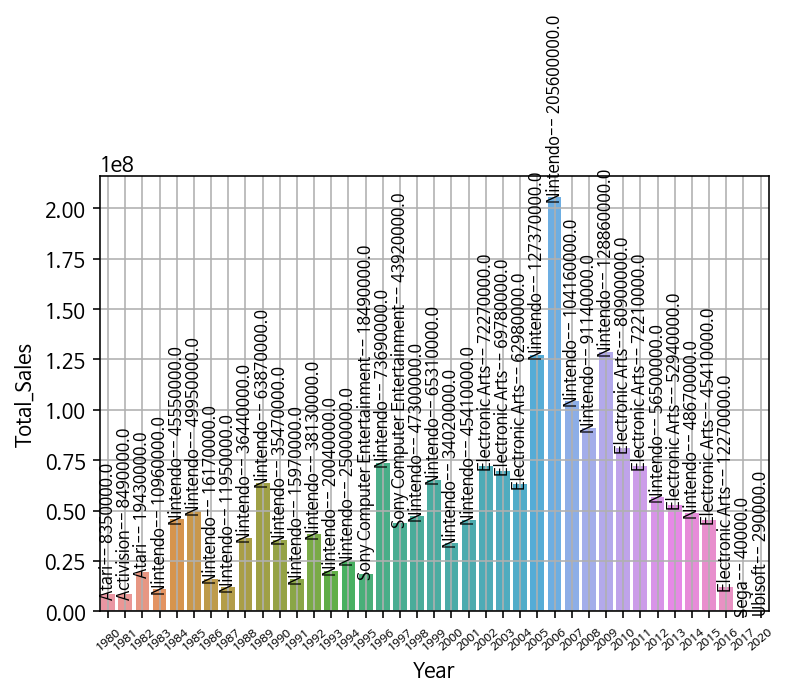

In [32]:
ax = sns.barplot(x = 'Year', y = 'Total_Sales', data = max_year_pub)
idx = 0

for value in max_year_pub['Total_Sales']:
    ax.text(x = idx, y = value + 5, s = str(genre[idx] + '--' + ' ' + str(round(value, 2))), fontsize = 8, rotation = 90, ha = 'center')
    idx += 1
plt.xticks(fontsize = 6, rotation = 40)
plt.grid()

plt.show()

In [49]:
# 최근 10년 출고량 상위 10개 게임

game_sales10 = df[df.Year >= 2011].sort_values('Total_Sales', ascending = False).head(10)
game_sales10 = game_sales10.reset_index(drop = True)
game_sales10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000.0,5810000.0,350000.0,2310000.0,14240000.0
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000.0,5880000.0,650000.0,2520000.0,14040000.0
5,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000.0,4300000.0,70000.0,1120000.0,13740000.0
6,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000.0,5820000.0,490000.0,1620000.0,13470000.0
7,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000.0,3910000.0,2670000.0,890000.0,12210000.0
8,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000.0,5810000.0,360000.0,2020000.0,11990000.0
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230000.0,3370000.0,3080000.0,650000.0,11330000.0


In [50]:
# 최근 10년 츨고량 상위 10개 플랫폼, 장르

def recent_year_sales10(df, col, sales):
    return df.groupby(col)[sales].sum().reset_index(name = 'sales').sort_values('sales', ascending = False).head(10)

platform_sales10 = recent_year_sales10(game_sales10, 'Platform', 'Total_Sales') #플랫폼

genre_sales10 = recent_year_sales10(game_sales10, 'Genre', 'Total_Sales') #장르


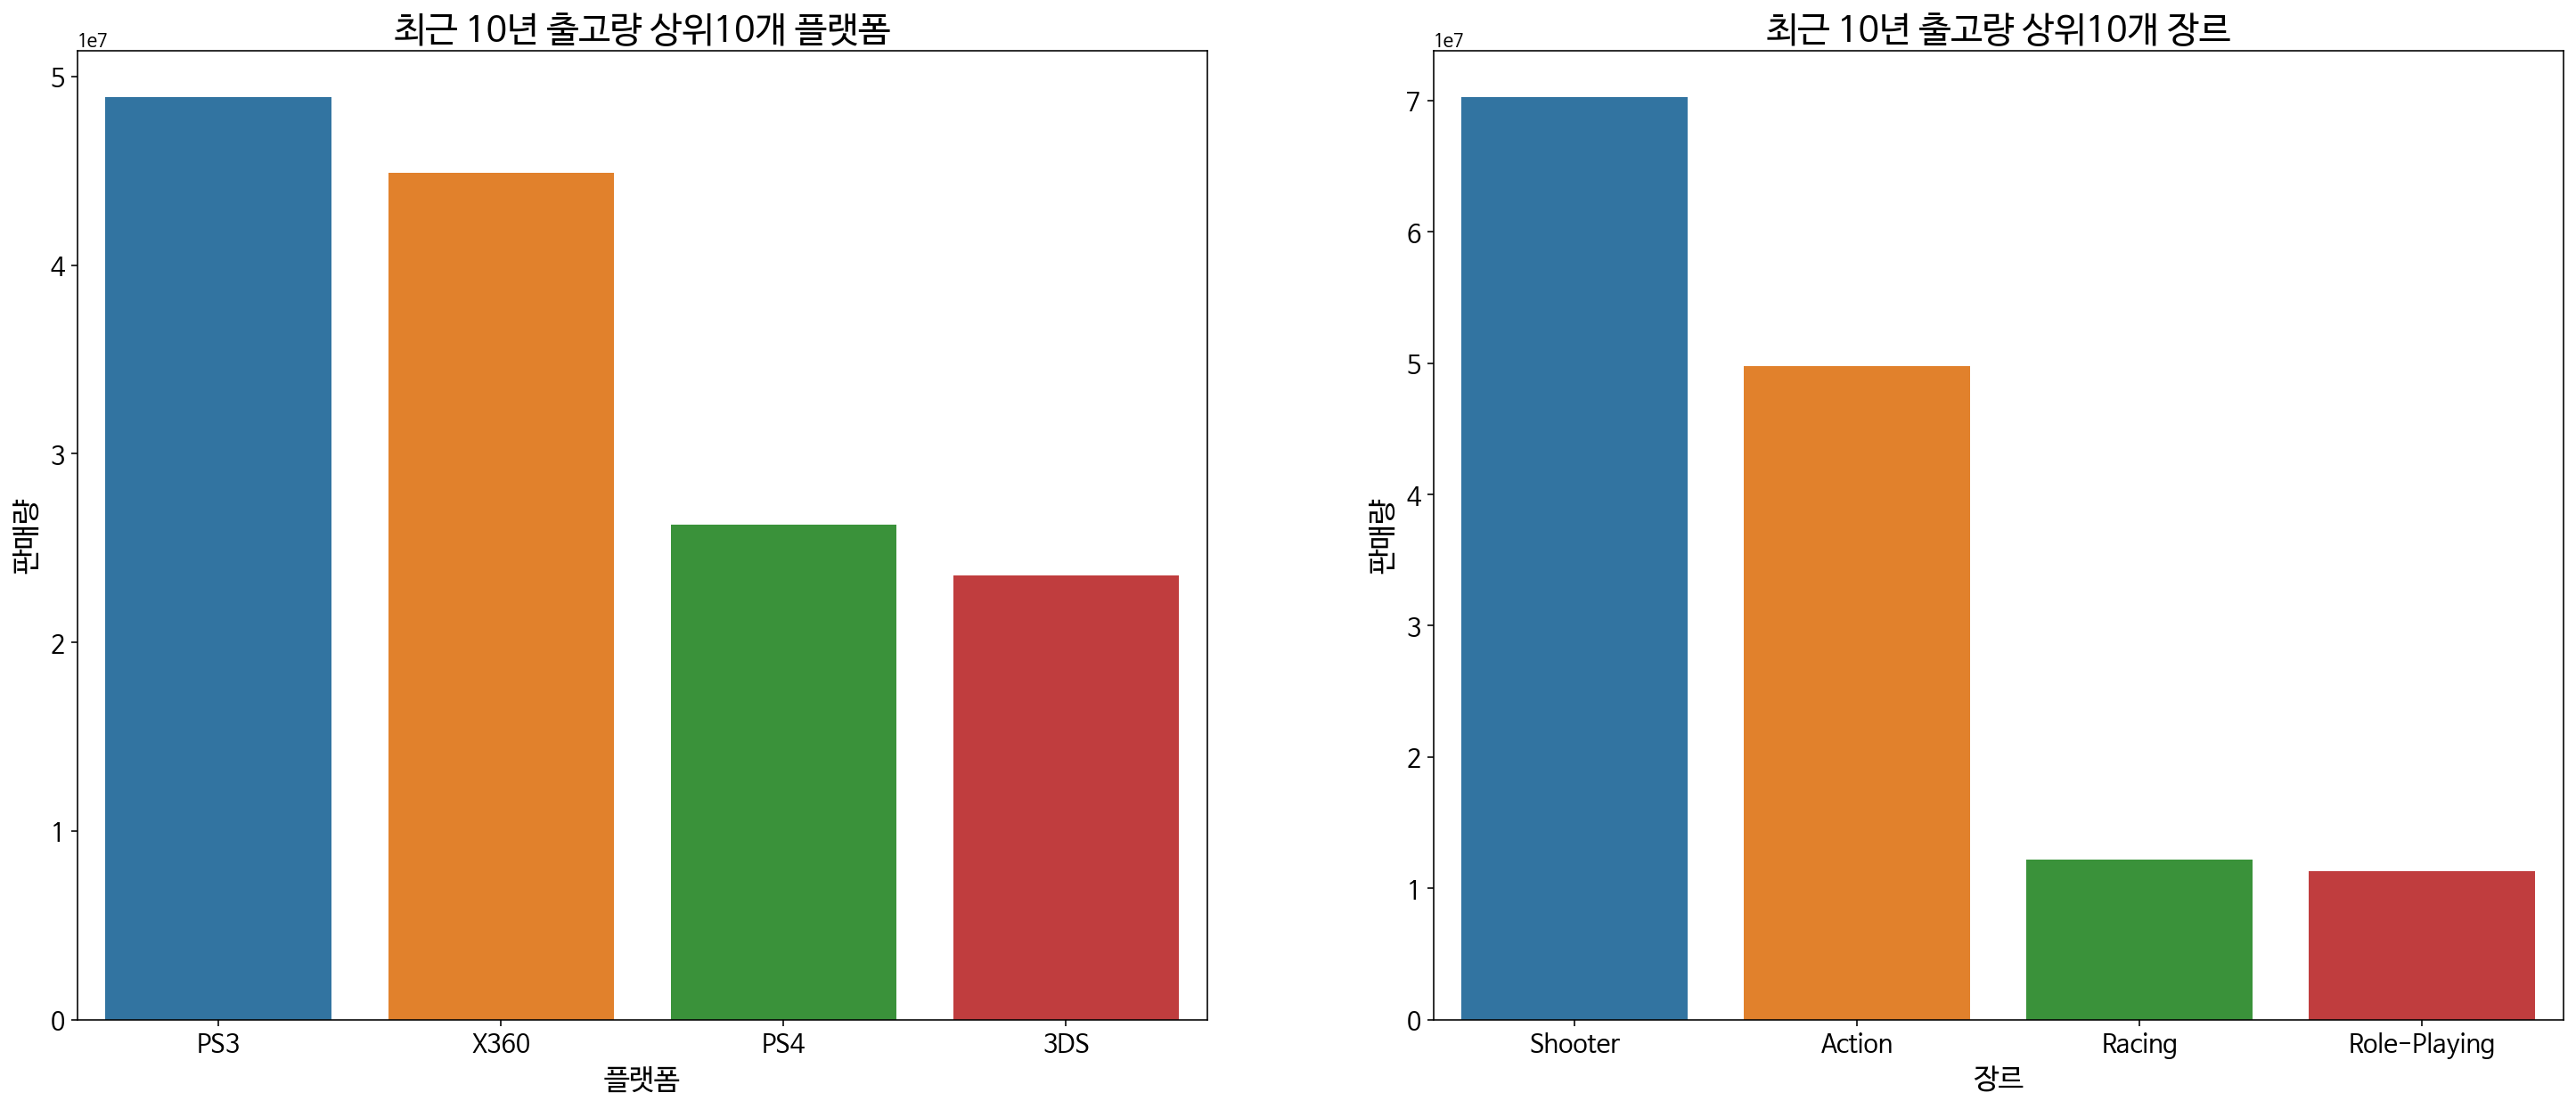

In [52]:
data_list = [platform_sales10, genre_sales10]

titles = ['최근 10년 출고량 상위10개 플랫폼', '최근 10년 출고량 상위10개 장르']
x_labels = ['플랫폼', '장르']

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2)
for i, data, title in zip(range(3), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=20)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=16)
    axs[i].set_ylabel('판매량', fontsize=16)
plt.show()

In [62]:
# 플랫폼과 장르

chi1 = pd.crosstab(top['Platform'], top['Genre'])
print('\np-value:',stats.chi2_contingency(chi1)[1])


p-value: 1.4080195512884985e-09
